In [1]:
!pip install yellowbrick

# Sales Prediction
## ( Simple Linear Regression)

### Постановка задачи¶
Постройте модель, которая прогнозирует продажи на основе денег, потраченных на разных платформах для маркетинга.

### Данные
Используйте набор рекламных данных, приведенный в ISLR, и анализируйте взаимосвязь между «телевизионной рекламой» и «продажами», используя простую модель линейной регрессии.

В этой записной книжке мы построим модель линейной регрессии для прогнозирования с использованием соответствующей предикторной переменной.Sales

## Загрузка данных

In [2]:

# Running the regression
import statsmodels.api as sm

In [3]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
advertising = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/trisha00001/file/main/Advertising.csv"))
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Проверка данных

In [5]:
advertising.shape

(200, 4)

In [6]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
advertising.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Очистка данных

In [8]:
# Checking Null values
advertising.isnull().sum()*100/advertising.shape[0]
# There are no NULL values in the dataset, hence it is clean.

,0
TV,0.0
radio,0.0
newspaper,0.0
sales,0.0


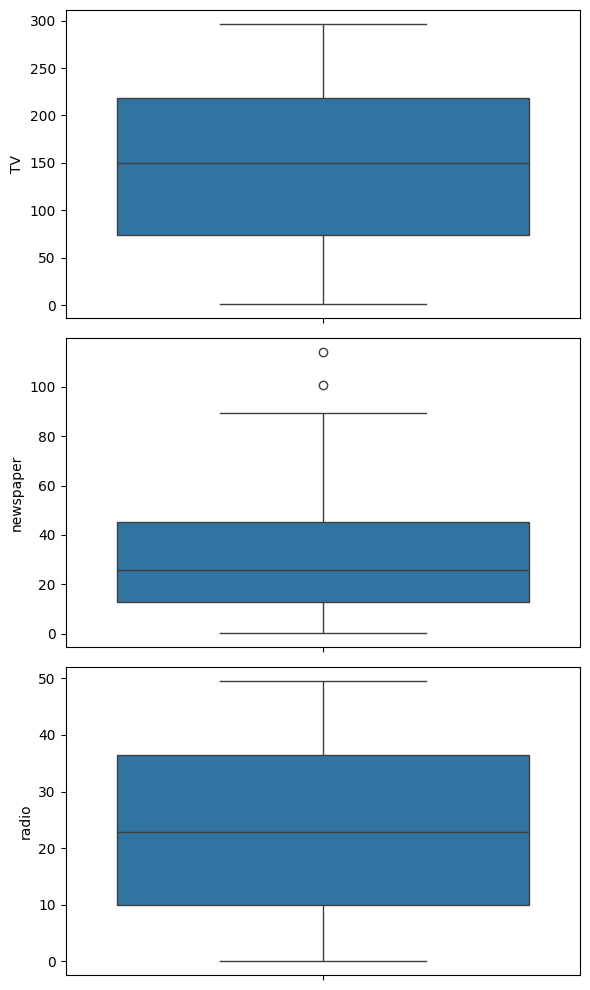

In [9]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (6,10))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['radio'], ax = axs[2])
plt.tight_layout()

In [10]:
# There are no considerable outliers present in the data.

## Исследовательский анализ данных

### Одномерный анализ

#### Продажи (целевая переменная)

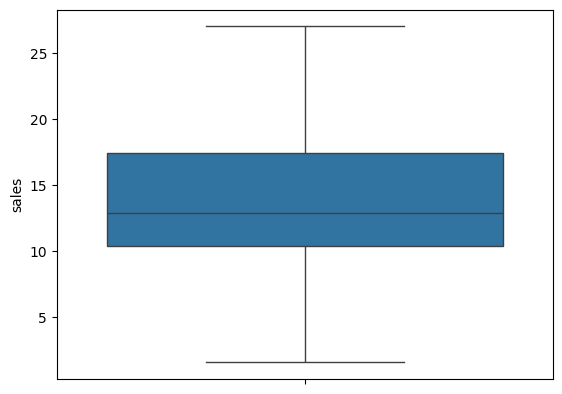

In [11]:
sns.boxplot(advertising['sales'])
plt.show()

# Задача 3: Связь между продажами и затратами на рекламу

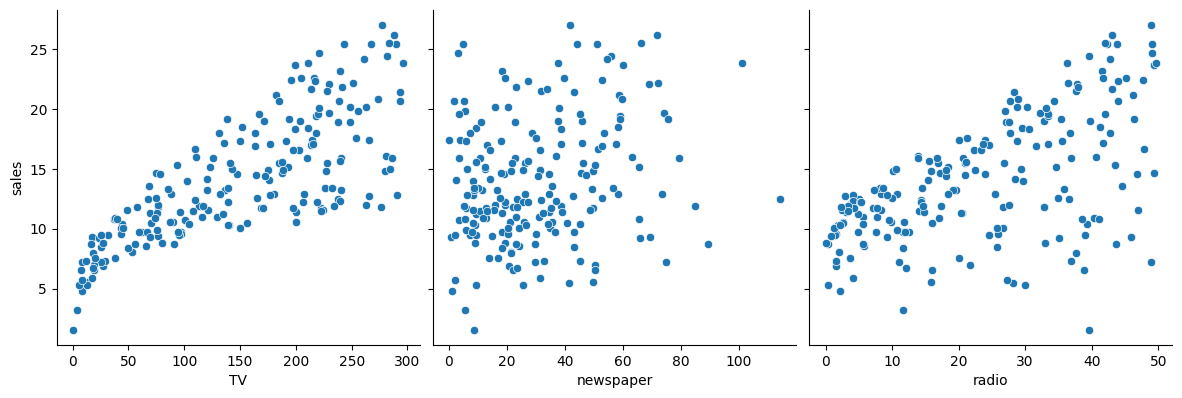

In [12]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(advertising, x_vars=['TV', 'newspaper', 'radio'], y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()

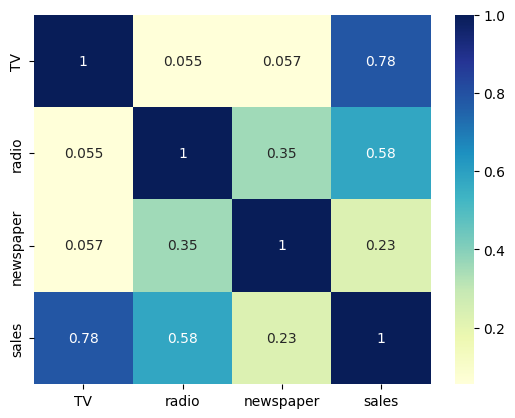

In [13]:
# Let's see the correlation between different variables.
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

наибольшая корелляция между TV и продажами, значит можно строить линейную регрессию  (TV - продажи)
Средняя радио - продажи . Газеты продажи слабо связаны.

Итак, давайте продолжим и выполним простую линейную регрессию, используя в качестве нашей переменной функции.Sales = F (TV)

0.782224 ТВ влияет если rxy > 0,7 , то связь между показателями ТВ и продажами высокая высокая и можно строить простую регрессию,

Имеет ли смысл в множественной регрессии предполагать, что нет взаимосвязи между продажами и рекламой в газетах, в то время как простая линейная регрессия предполагает обратное? На самом деле, имеет. Посмотрим на корреляционную матрицу и заметим, что корреляция между радио и газетами равна 0.35. Это раскрывает тенденцию тратить больше на рекламу в газетах в регионах, где больше тратиться на рекламу по радио. Теперь предположим, что множественная регрессия корректна, и реклама в газетах не оказывает прямого влияния на продажи, а радиореклама действительно увеличивает продажи. Тогда в регионах, где мы тратим больше на радио, наши продажи будут выше, и, как показывает корреляционная матрица, мы также будем стремиться потратить больше на рекламу в газетах в этих регионах. Таким образом, газеты приписывают себе заслугу влияния радио на продажи.

Имеет ли смысл в множественной регрессии предполагать, что нет взаимосвязи между продажами и рекламой в газетах, в то время как простая линейная регрессия предполагает обратное? На самом деле, имеет. Посмотрим на корреляционную матрицу и заметим, что корреляция между радио и газетами равна 0.35. Это раскрывает тенденцию тратить больше на рекламу в газетах в регионах, где больше тратиться на рекламу по радио. Теперь предположим, что множественная регрессия корректна, и реклама в газетах не оказывает прямого влияния на продажи, а радиореклама действительно увеличивает продажи. Тогда в регионах, где мы тратим больше на радио, наши продажи будут выше, и, как показывает корреляционная матрица, мы также будем стремиться потратить больше на рекламу в газетах в этих регионах. Таким образом, газеты приписывают себе заслугу влияния радио на продажи.

## Построение моделей

### Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

### Построение линейной регрессии с помощью библиотеки `statsmodels`

X может представлять ТВ рекламу, а Y
может представлять продажи. Тогда мы можем
регрессировать продажи на ТВ рекламу с помощью
модели


In [14]:
X = advertising['TV']
y = advertising['sales']

In [15]:
# Add a constant to get an intercept

x1 = sm.add_constant(X)
# Fit the resgression line using 'OLS'
lr = sm.OLS(y, x1).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 02 Jul 2025   Prob (F-statistic):           1.47e-42
Time:                        09:15:00   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

-  В случае рекламы по ТВ 95% доверительный интервал для β0 имеет вид (6.130, 7.935), и 95% доверительный интервал для β1 имеет вид (0.042, 0.053).
- Отсюда мы можем заключить, что при отсутствии всякой рекламы продажи упадут, в среднем, на величину между 6,130 и 7,940 единиц. Более того, для каждого увеличения бюджета рекламы на ТВ на $1,000 будет среднее увеличение продаж на величину от 42 до 53 единиц.

R-squared: Это означает, что 61,3% дисперсии объясняетсяSalesTV

 Коэффициент для телевизора составляет 0,0458, с очень низким значением p¶
Коэффициент статистически значим. Так что ассоциация не является чисто случайной.

Статистика F имеет очень низкое значение p (практически низкое)
Это означает, что модель является статистически значимой, а объясненная дисперсия не является чисто случайной/

Давайте визуализируем модель регрессии

$ Sales = 6.987 + 0.0465 \times TV $

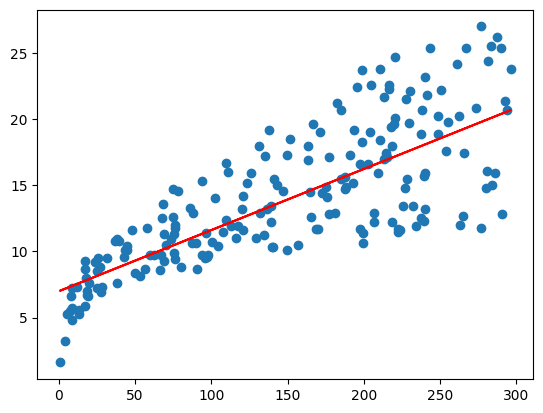

In [16]:
plt.scatter(X, y)
plt.plot(X, 6.987 + 0.0462*X, 'r')
plt.show()

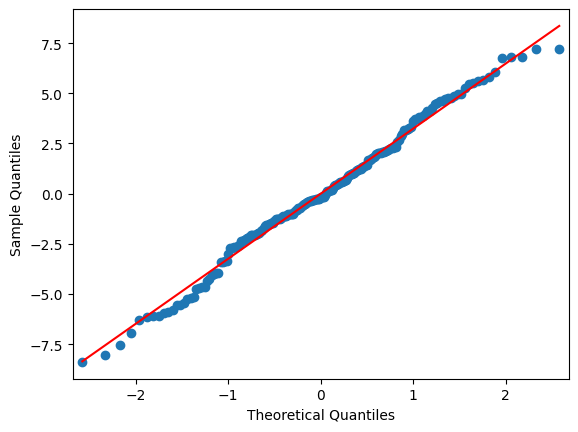

In [17]:
sm.qqplot(lr.resid, line='s');

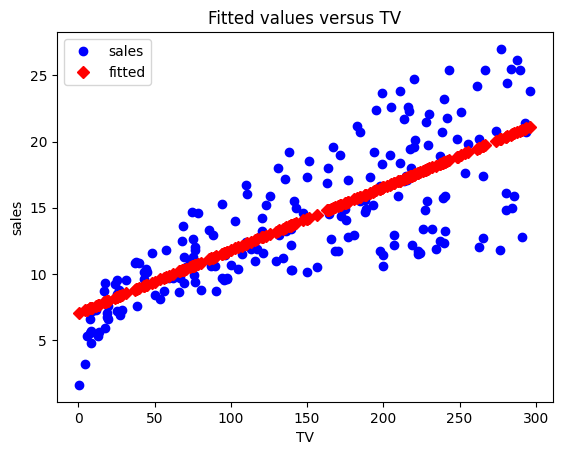

In [18]:
sm.graphics.plot_fit(lr,1, vlines=False);

В случае рекламы по ТВ 95% доверительный
интервал для β0 имеет вид (5.907, 8.073), и
95% доверительный интервал для β1 имеет
вид (0.040, 0.053).

Отсюда мы можем заключить, что при
отсутствии всякой рекламы продажи упадут,
в среднем, на величину между 5,907 и 8,073
единиц. Более того, для каждого увеличения
бюджета рекламы на ТВ на $1,000 будет
среднее увеличение продаж на величину от 40
до 53 единиц.


Стандартные ошибки могут использоваться
для проверки гипотез для коэффициентов.
Самой общей является проверка нулевой
гипотезы
H0: нет связи между X и Y.
• Альтернативная гипотеза
Ha: существует какая-то связь между X и Y.
• Математически это эквивалентно проверке
H0: β1=0
Ha: β1≠0
так как если β1 =0, то модель (5) сводится к
Y = β0 + є, и X не связано с Y

**существует какая-то связь между X и Y!!!**

####  Looking at some key statistics from the summary

The values we are concerned with are -
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

##### 1. The coefficient for TV is 0.0465, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance.

##### 2. R - squared is 0.613
Meaning that 61.3% of the variance in `Sales` is explained by `TV`

This is a decent R-squared value.

###### 3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

---
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Sales = 6.987 + 0.0465 \times TV $

In [19]:
from sklearn.linear_model import LinearRegression

# create X and y
feature_cols = ['TV']
X = advertising[feature_cols]
y = advertising.sales

# instantiate and fit
lm1 = LinearRegression()
lm1.fit(X, y)

# print the coefficients
print(lm1.intercept_)
print(lm1.coef_)

7.032593549127695
[0.04753664]


## Множественная регрессия

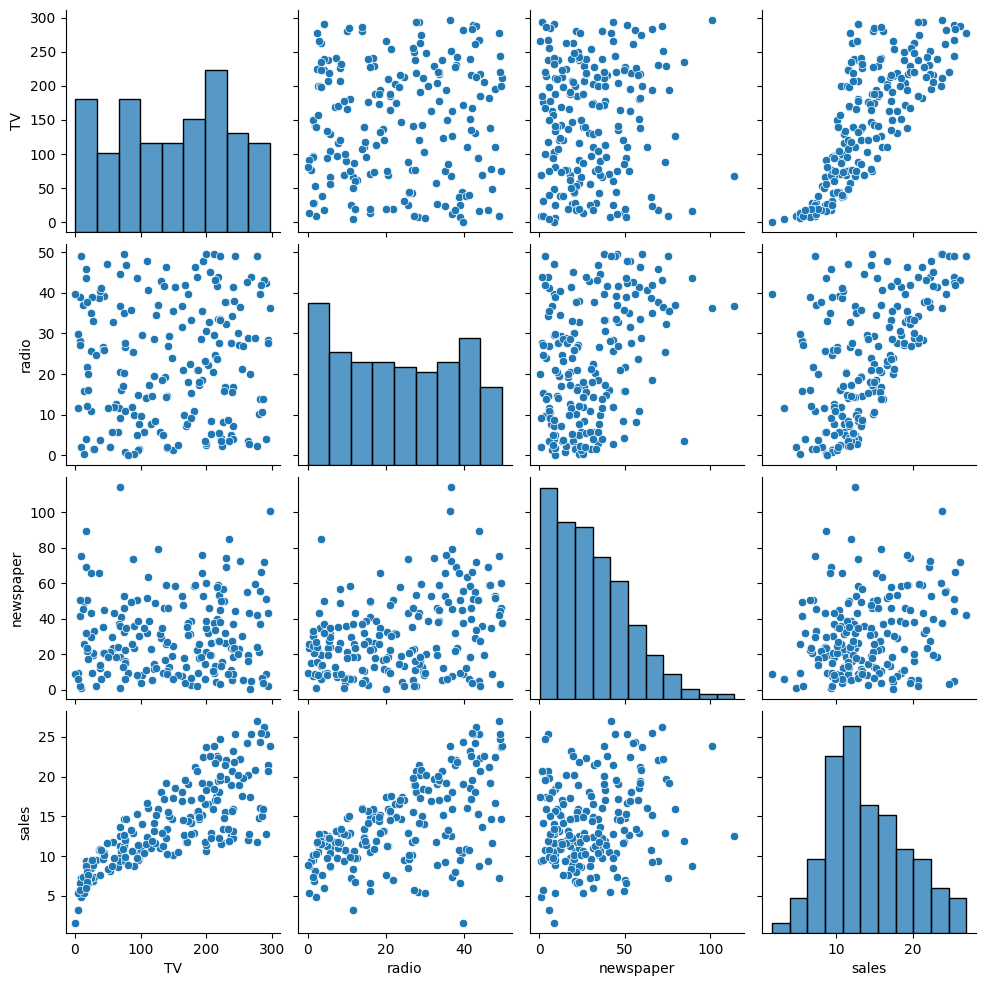

In [20]:
p = sns.pairplot(advertising)

In [21]:
# Define the dependent variable to be the GPA
y = advertising['sales']

# Define the independent variable to be the SAT score
x2 = advertising[['TV','radio','newspaper']]

In [22]:
x2 = sm.add_constant(x2)

x2.head()

,const,TV,radio,newspaper
0,1.0,230.1,37.8,69.2
1,1.0,44.5,39.3,45.1
2,1.0,17.2,45.9,69.3
3,1.0,151.5,41.3,58.5
4,1.0,180.8,10.8,58.4


In [23]:
results = sm.OLS(y,x2).fit()

In [24]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 02 Jul 2025   Prob (F-statistic):           1.58e-96
Time:                        09:17:12   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Для данного количества рекламы по ТВ и в газетах,
затраты дополнительных $1,000 на рекламу по
радио дают рост продаж приблизительно на 189
единиц. Если сравнить оценки коэффициентов
множественной регрессии с оценками
коэффициентов простой регрессии, можно
заметить, что оценки коэффициентов
множественной регрессии для ТВ и радио похожи
на оценки простой линейной регрессии. Однако, в
то время как коэффициент простой регрессии для
газет был существенно отличен от нуля, в
множественной регрессии коэффициент для газет
близок к нули, а соответствующее p-value больше
не является значимым и примерно равно 0.86

In [25]:
# Define the dependent variable to be the GPA
y = advertising['sales']

# Define the independent variable to be the SAT score
x3 = advertising[['TV','radio']]

In [26]:
x3 = sm.add_constant(x3)

x3.head()

,const,TV,radio
0,1.0,230.1,37.8
1,1.0,44.5,39.3
2,1.0,17.2,45.9
3,1.0,151.5,41.3
4,1.0,180.8,10.8


In [27]:
results = sm.OLS(y,x3).fit()

In [28]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 02 Jul 2025   Prob (F-statistic):           4.83e-98
Time:                        09:17:21   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
from sklearn.linear_model import LinearRegression

# create X and y
feature_cols = ['TV', 'radio', 'newspaper']
X = advertising[feature_cols]
y = advertising.sales

# instantiate and fit
lm1 = LinearRegression()
lm1.fit(X, y)

# print the coefficients
print(lm1.intercept_)
print(lm1.coef_)

2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = advertising[['TV', 'radio', 'newspaper']]
y = advertising.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm4 = LinearRegression()
lm4.fit(X_train, y_train)
lm4_preds = lm4.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm4_preds)))
print("R^2: ", r2_score(y_test, lm4_preds))

RMSE : 1.404651423032895
R^2:  0.9156213613792232


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = advertising[['TV', 'radio']]
y = advertising.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm5 = LinearRegression()
lm5.fit(X_train, y_train)
lm5_preds = lm5.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm4_preds)))
print("R^2: ", r2_score(y_test, lm4_preds))

RMSE : 1.404651423032895
R^2:  0.9156213613792232


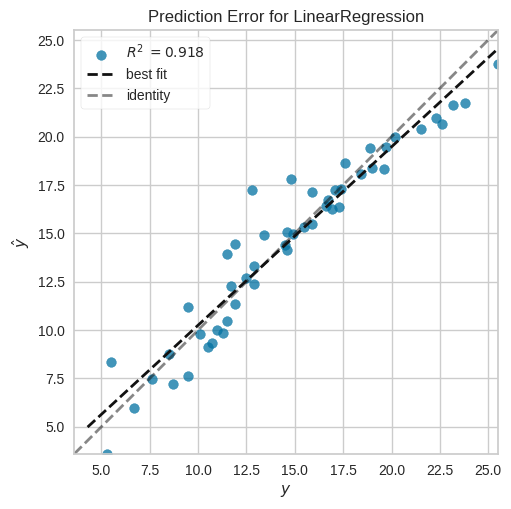

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [32]:
from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer = PredictionError(lm5)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()

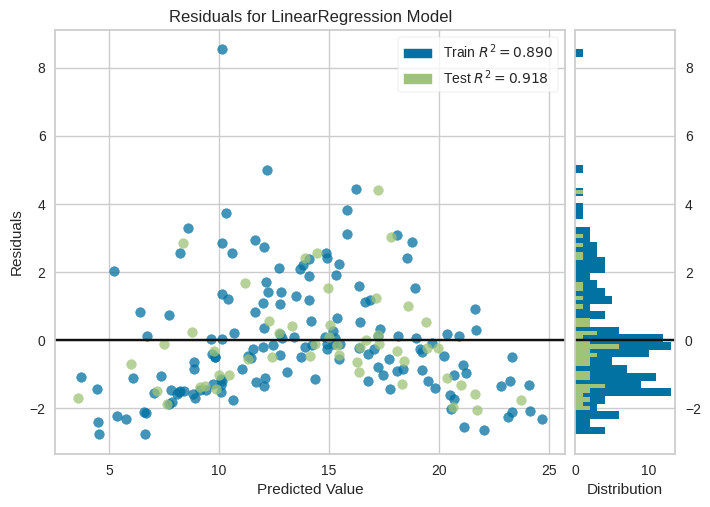

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [33]:
visualizer = ResidualsPlot(lm5)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [34]:
advertising['interaction'] = advertising['TV'] * advertising['radio']

In [35]:
advertising.head()

,TV,radio,newspaper,sales,interaction
0,230.1,37.8,69.2,22.1,8697.78
1,44.5,39.3,45.1,10.4,1748.85
2,17.2,45.9,69.3,9.3,789.48
3,151.5,41.3,58.5,18.5,6256.95
4,180.8,10.8,58.4,12.9,1952.64


In [36]:
# Define the dependent variable to be the GPA
y = advertising['sales']

# Define the independent variable to be the SAT score
x1 = advertising[['TV','radio', 'interaction']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm6 = LinearRegression()
lm6.fit(X_train, y_train)
lm6_preds = lm6.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm6_preds)))
print("R^2: ", r2_score(y_test, lm6_preds))

RMSE : 1.3879034699382888
R^2:  0.9176214942248907


In [37]:
x = sm.add_constant(x1)

x.head()

,const,TV,radio,interaction
0,1.0,230.1,37.8,8697.78
1,1.0,44.5,39.3,1748.85
2,1.0,17.2,45.9,789.48
3,1.0,151.5,41.3,6256.95
4,1.0,180.8,10.8,1952.64


In [38]:
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          6.68e-146
Time:                        09:17:53   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.7502      0.248     27.233      0.000       6.261       7.239
TV              0.0191      0.002     12.699      0.000       0.016       0.022
radio           0.0289      0.009      3.241      0.001       0.011       0.046
interaction     0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Эффект синергии вносит существенный вклад  в модель прогноза

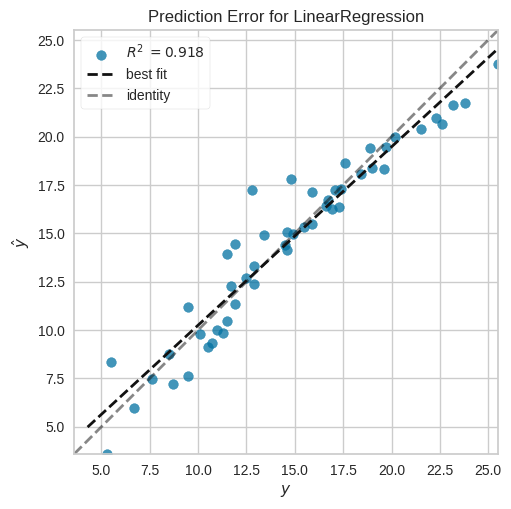

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [39]:
visualizer = PredictionError(lm6)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()

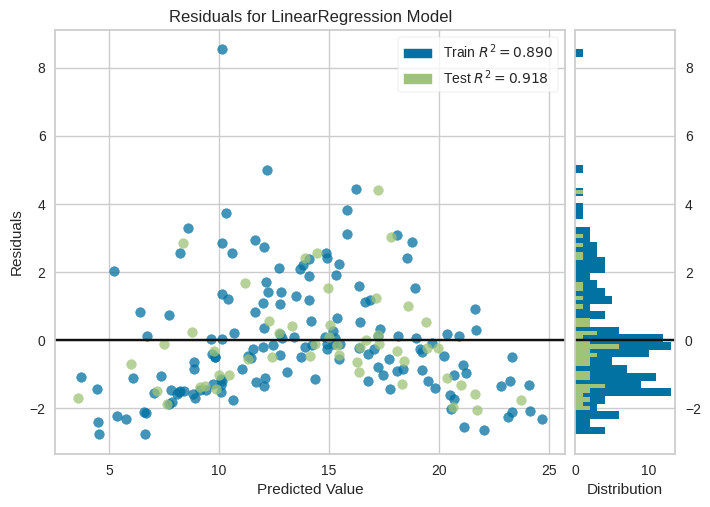

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [40]:
visualizer = ResidualsPlot(lm6)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()